## Quantitative comparisons and statistical visualizations

Visualizations can be used to compare data in a quantitative manner. This chapter explains several methods for quantitative visualizations.

### Bar chart
Bar charts visualize data that is organized according to categories as a series of bars, where the height of each bar represents the values of the data in this category.

For example, in this exercise, you will visualize the number of gold medals won by each country in the provided medals DataFrame. The DataFrame contains the countries as the index, and a column called "Gold" that contains the number of gold medals won by each country, according to their rows.

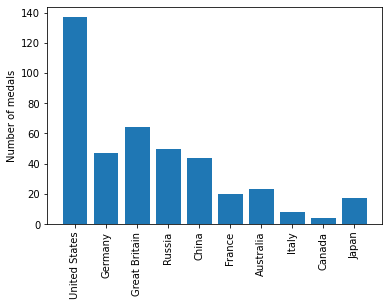

In [5]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from file using read_csv
medals = pd.read_csv('medals_by_country_2016.csv')

fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(medals['Country'], medals["Gold"])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals['Country'], rotation = 90)

# Set the y-axis label
ax.set_ylabel('Number of medals')

plt.show()

### Stacked bar chart
A stacked bar chart contains bars, where the height of each bar represents values. In addition, stacked on top of the first variable may be another variable. The additional height of this bar represents the value of this variable. And you can add more bars on top of that.

In this exercise, you will have access to a DataFrame called medals that contains an index that holds the names of different countries, and three columns: "Gold", "Silver" and "Bronze". You will also have a Figure, fig, and Axes, ax, that you can add data to.

You will create a stacked bar chart that shows the number of gold, silver, and bronze medals won by each country, and you will add labels and create a legend that indicates which bars represent which medals.

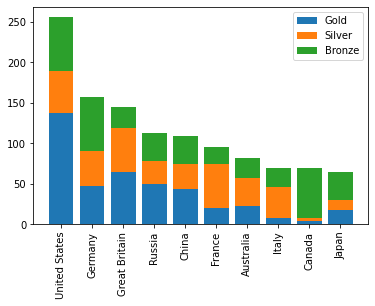

In [7]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals['Country'], medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals['Country'], medals['Silver'] , bottom = medals['Gold'], label = "Silver")

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals['Country'], medals['Bronze'] , bottom = medals['Gold']+medals['Silver'], label = "Bronze")

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals['Country'], rotation = 90)

# Display the legend
ax.legend()

plt.show()

### Creating histograms
Histograms show the full distribution of a variable. In this exercise, we will display the distribution of weights of medalists in gymnastics and in rowing in the 2016 Olympic games for a comparison between them.

You will have two DataFrames to use. The first is called mens_rowing and includes information about the medalists in the men's rowing events. The other is called mens_gymnastics and includes information about medalists in all of the Gymnastics events.

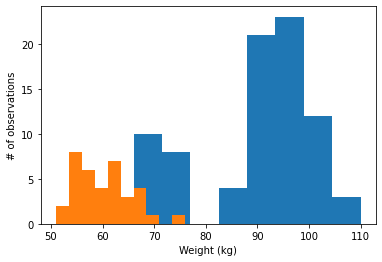

In [18]:
# Read the data from file using read_csv
summer = pd.read_csv('summer2016.csv')

mens = summer[summer['Sex'] == 'M']


mens_rowing = mens[mens['Sport'] == 'Rowing']
mens_gymnastics = mens[mens['Sport'] == 'Gymnastics']

fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])
# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

### "Step" histogram
Histograms allow us to see the distributions of the data in different groups in our data. In this exercise, you will select groups from the Summer 2016 Olympic Games medalist dataset to compare the height of medalist athletes in two different sports.

The data is stored in a Pandas DataFrame object called summer_2016_medals that has a column "Height". In addition, you are provided a Pandas GroupBy object that has been grouped by the sport.

In the exercise below, you will visualize and label the histograms of two sports: "Gymnastics" and "Rowing" and see the marked difference between medalists in these two sports.

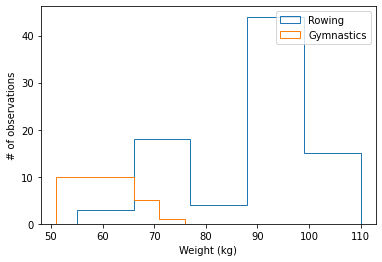

In [19]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], label="Rowing", histtype= 'step', bins = 5)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], label = 'Gymnastics', histtype = 'step', bins = 5)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Adding error-bars to a bar chart
Statistical plotting techniques add quantitative information for comparisons into the visualization. For example, in this exercise, we will add error bars that quantify not only the difference in the means of the height of medalists in the 2016 Olympic Games, but also the standard deviation of each of these groups, as a way to assess whether the difference is substantial relative to the variability within each group.

For the purpose of this exercise, you will have two DataFrames: mens_rowing holds data about the medalists in the rowing events and mens_gymnastics will hold information about the medalists in the gymnastics events.

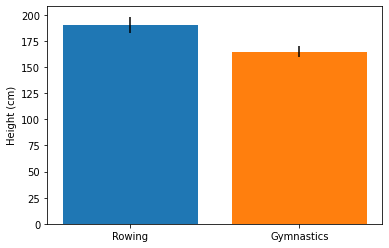

In [20]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing["Height"].mean(), yerr= mens_rowing["Height"].std())

# Add a bar for the gymnastics "Height" column mean/std

ax.bar("Gymnastics", mens_gymnastics["Height"].mean(), yerr= mens_gymnastics["Height"].std())


# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Adding error-bars to a plot
Adding error-bars to a plot is done by using the errorbars method of the Axes object.

Here, you have two DataFrames loaded: seattle_weather has data about the weather in Seattle and austin_weather has data about the weather in Austin. Each DataFrame has a column "MONTH" that has the names of the months, a column "MLY-TAVG-NORMAL" that has the average temperature in each month and a column "MLY-TAVG-STDDEV" that has the standard deviation of the temperatures across years.

In the exercise, you will plot the mean temperature across months and add the standard deviation at each point as y errorbars.

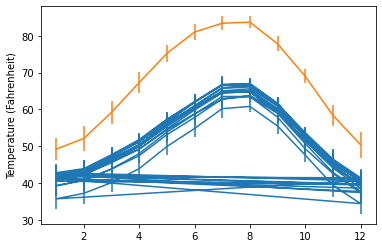

In [21]:
#data

seattle_weather = pd.read_csv('seattle_weather.csv')
austin_weather = pd.read_csv('austin_weather.csv')

fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather["MONTH"], seattle_weather["MLY-TAVG-NORMAL"], yerr = seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather["MONTH"], austin_weather["MLY-TAVG-NORMAL"], yerr = austin_weather["MLY-TAVG-STDDEV"])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

### Creating boxplots
Boxplots provide additional information about the distribution of the data that they represent. They tell us what the median of the distribution is, what the inter-quartile range is and also what the expected range of approximately 99% of the data should be. Outliers beyond this range are particularly highlighted.

In this exercise, you will use the data about medalist heights that you previously visualized as histograms, and as bar charts with error bars, and you will visualize it as boxplots.

Again, you will have the mens_rowing and mens_gymnastics DataFrames available to you, and both of these DataFrames have columns called "Height" that you will compare.

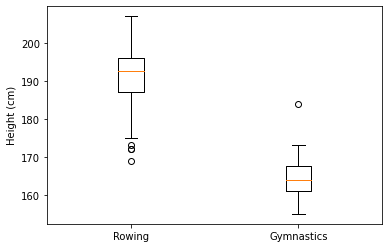

In [22]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing["Height"], mens_gymnastics["Height"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Rowing", "Gymnastics"])

# Add a y-axis label
ax.set_ylabel("Height (cm)")

plt.show()

### Simple scatter plot
Scatter are a bi-variate visualization technique. They plot each record in the data as a point. The location of each point is determined by the value of two variables: the first variable determines the distance along the x-axis and the second variable determines the height along the y-axis.

In this exercise, you will create a scatter plot of the climate_change data. This DataFrame, which is already loaded, has a column "co2" that indicates the measurements of carbon dioxide every month and another column, "relative_temp" that indicates the temperature measured at the same time.

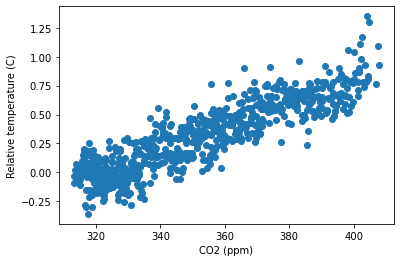

In [23]:
# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', parse_dates = True, index_col ="date")

fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'],climate_change['relative_temp'] )

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

### Encoding time by color
The screen only has two dimensions, but we can encode another dimension in the scatter plot using color. Here, we will visualize the climate_change dataset, plotting a scatter plot of the "co2" column, on the x-axis, against the "relative_temp" column, on the y-axis. We will encode time using the color dimension, with earlier times appearing as darker shades of blue and later times appearing as brighter shades of yellow.

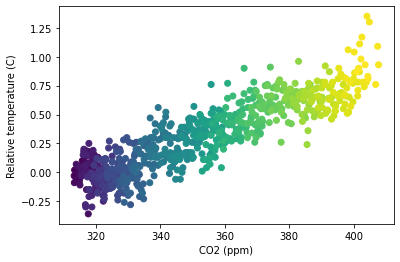

In [24]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'],climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()